# Visualizing Data about Loans

This project visualizes data about loans awarded by the non-profit organization [Kiva](https://www.kiva.org/ "Kiva"). The dataset is from [Kaggle](https://www.kaggle.com/datasets/fkosmowski/kivadhsv1 "Kaggle") and is already cleaned. I create the visualizations using Seaborn and Matplotlib. 

The goal of the project is to generate insights about the loans awarded by Kiva. I visualize the distribution of the loans by country, type of project, and gender. 

### Step 1: Import necessary Python modules

In [4]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Step 2: Ingest the data

In [5]:
df = pd.read_csv('kiva_data.csv')

### Step 3: Examine the data

In [11]:
print(df.head())

   loan_amount               activity   country  gender
0          625  Food Production/Sales  Pakistan  female
1          250  Food Production/Sales  Pakistan  female
2          400  Food Production/Sales  Pakistan  female
3          400  Food Production/Sales  Pakistan  female
4          500  Food Production/Sales  Pakistan  female


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65499 entries, 0 to 65498
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loan_amount  65499 non-null  int64 
 1   activity     65499 non-null  object
 2   country      65499 non-null  object
 3   gender       65499 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB
None


In [10]:
df.describe(include = 'all')

,loan_amount,activity,country,gender
count,65499.000000,65499,65499,65499
unique,NaN,3,5,2
top,NaN,General Store,Philippines,female
freq,NaN,49516,50273,61632
mean,361.627277,NaN,NaN,NaN
std,194.798936,NaN,NaN,NaN
min,50.000000,NaN,NaN,NaN
25%,225.000000,NaN,NaN,NaN
50%,325.000000,NaN,NaN,NaN
75%,450.000000,NaN,NaN,NaN


In [12]:
print(df.country.unique())

['Pakistan' 'Kenya' 'El Salvador' 'Philippines' 'Cambodia']


Each row represents a loan that is awarded by Kiva. The information for each entry includes:
- loan_amount: the amount awarded to the project in U.S. dollars
- activity: the type of project
- country: the country where the project is located. There is data covering five countries that I displayed with unique().
- gender: the gender of the primary person who applied for the loan.

The data in the column 'loan_amount' is already with dtype int64 so there is no need of transforming it. 

### Step 4: Visualize the average amount of loans by country

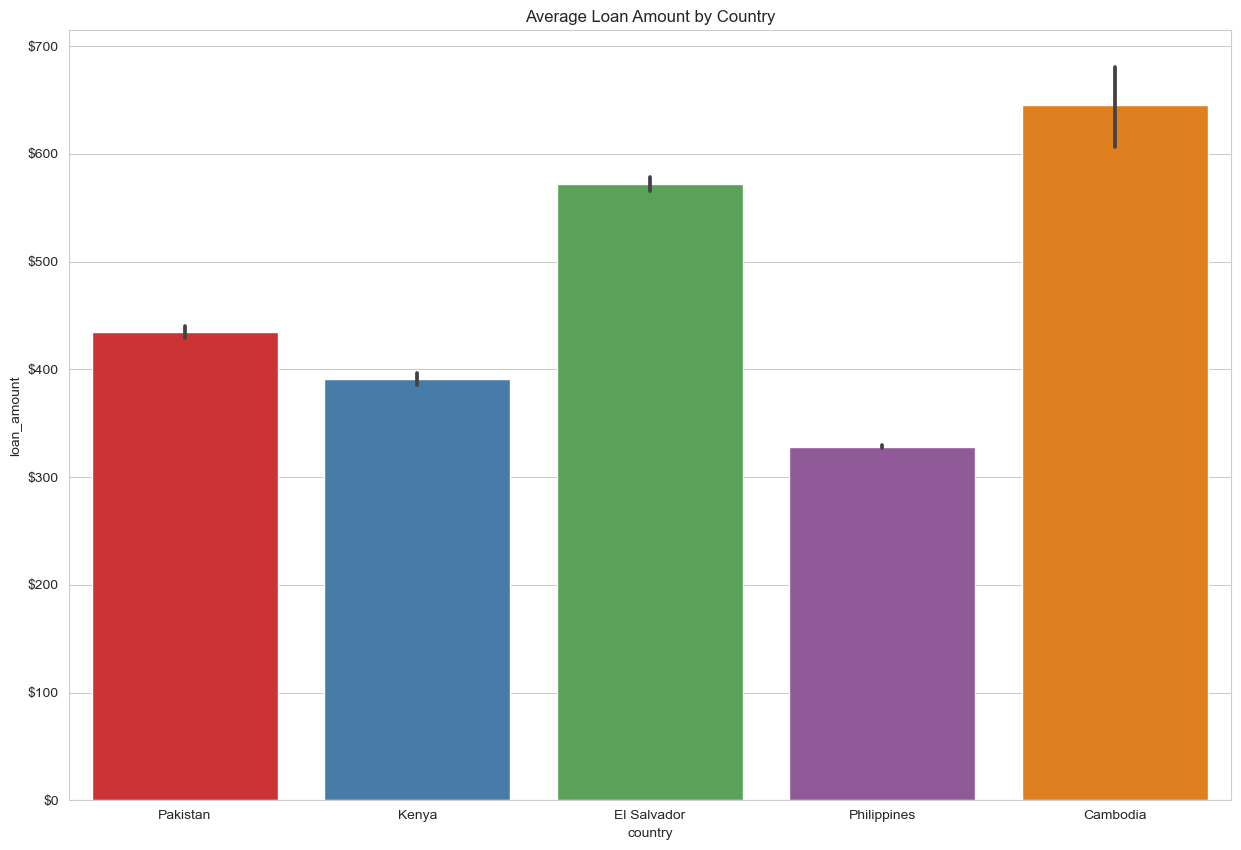

In [52]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data = df, x = 'country', y = 'loan_amount')
ax.set_title('Average Loan Amount by Country')

# Format the y-axis ticks to include '$' (units of USD)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Styling
sns.set_palette('Dark2')
sns.set_style('whitegrid')

Cambodia is the country that has the highest average amount of loans awarded by Kiva, while Philippines has received the lowest.

### Step 5: Visualize the average amount of loans by country, nested by gender

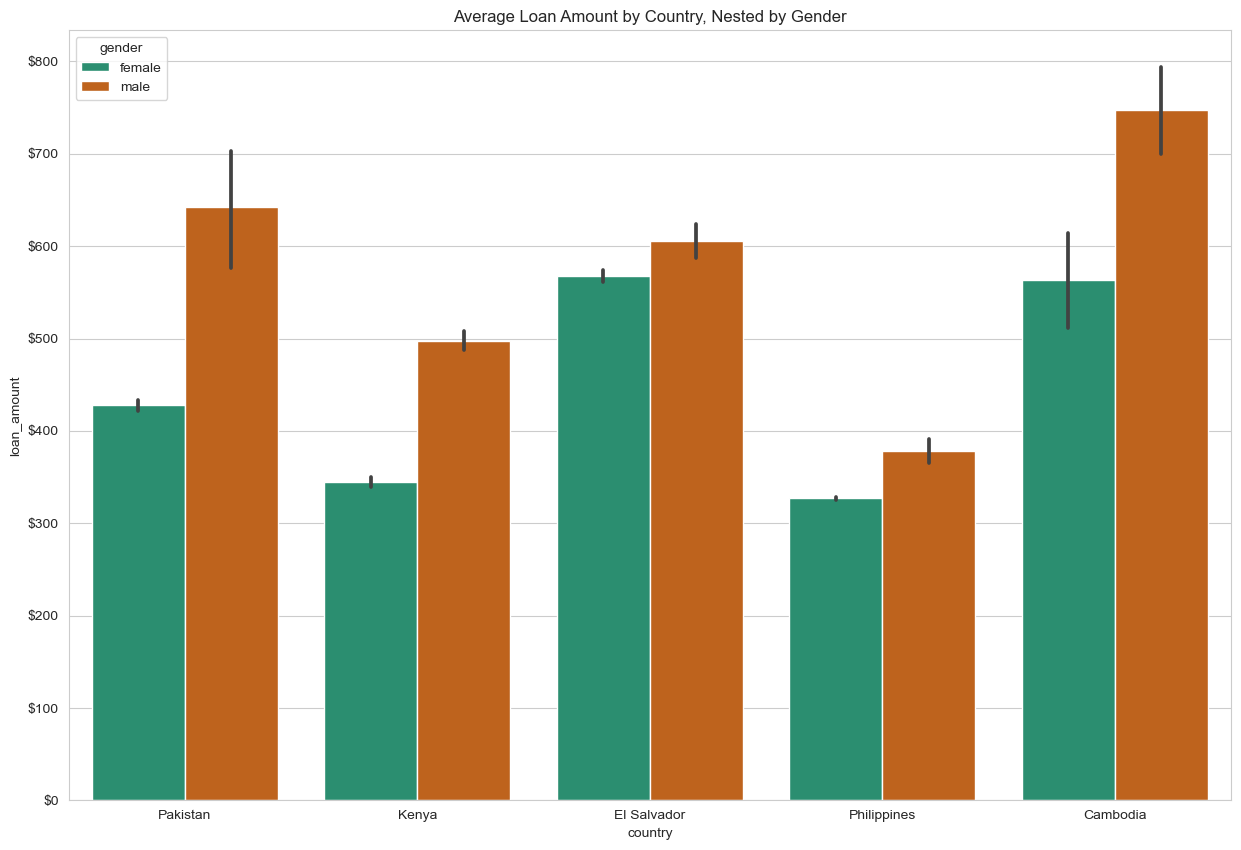

In [53]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data = df, x = 'country', y = 'loan_amount', hue = 'gender')
ax.set_title('Average Loan Amount by Country, Nested by Gender')

# Format the y-axis ticks to include '$' (units of USD)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Styling
sns.set_palette('Dark2')

In all of the five countries male recipients have received larger loans from Kiva. El Salvador is the country that has the least disparity in loan amounts awarded by gender. The gender gap is significantly wider in Pakistan, Cambodia and Kenya. Kiva could look into the reasons for this inequality and consider encouraging awards of higher loans to females in these countries.

### Step 6: Visualize the average amount of loans by country, nested by activity

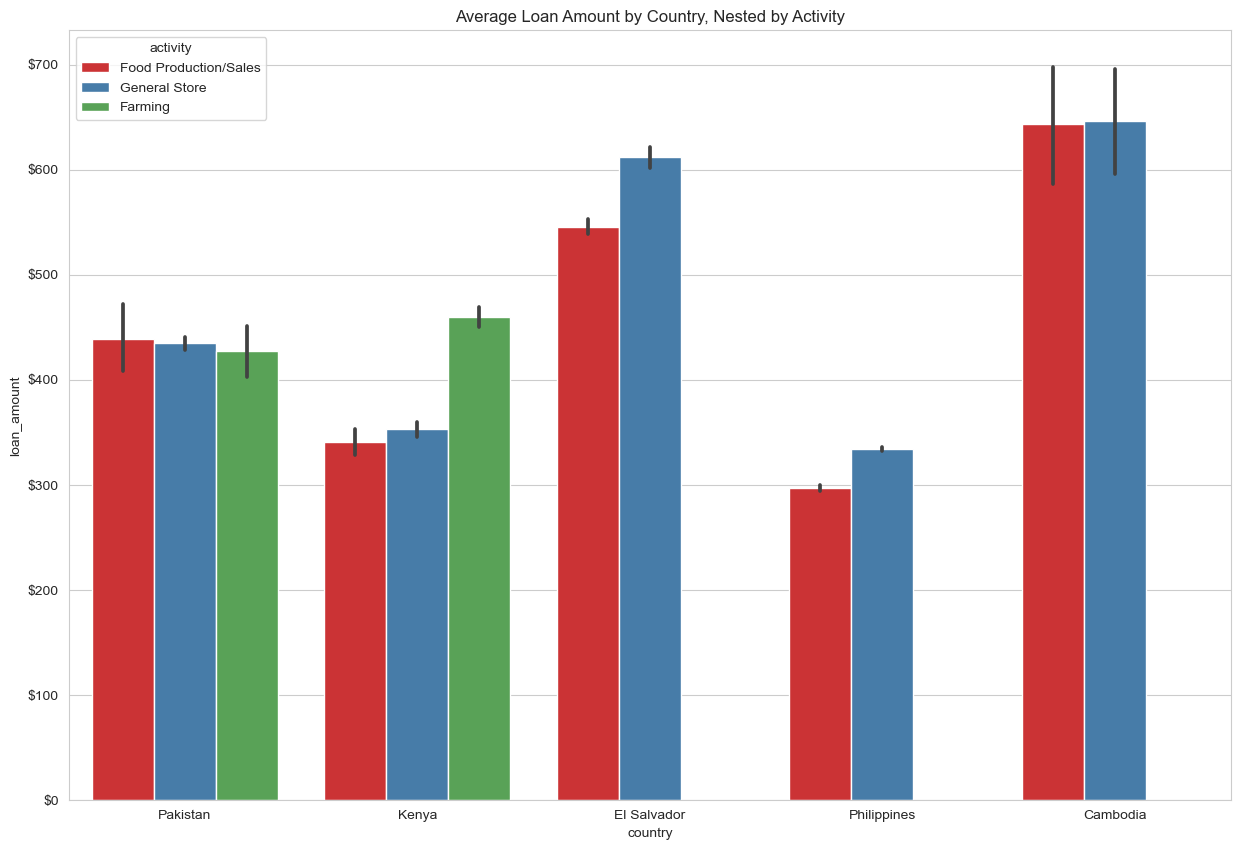

In [55]:
import matplotlib.ticker as mtick

f, ax = plt.subplots(figsize=(15, 10))

sns.barplot(data = df, x = 'country', y = 'loan_amount', hue = 'activity')
ax.set_title('Average Loan Amount by Country, Nested by Activity')

# Format the y-axis ticks to include '$' (units of USD)
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

# Styling
sns.set_palette('Set1')

Loans for farming are awarded only in Pakistan and Kenya. However, potential opportunities for such loans could also be explored in El Salvador, Philippines and Cambodia. The loan amounts for Food Production/Sales and General Store are relatively similar in all the countries except for El Salvador and Philippines.

### Step 7: Compare the distribution of loans by country

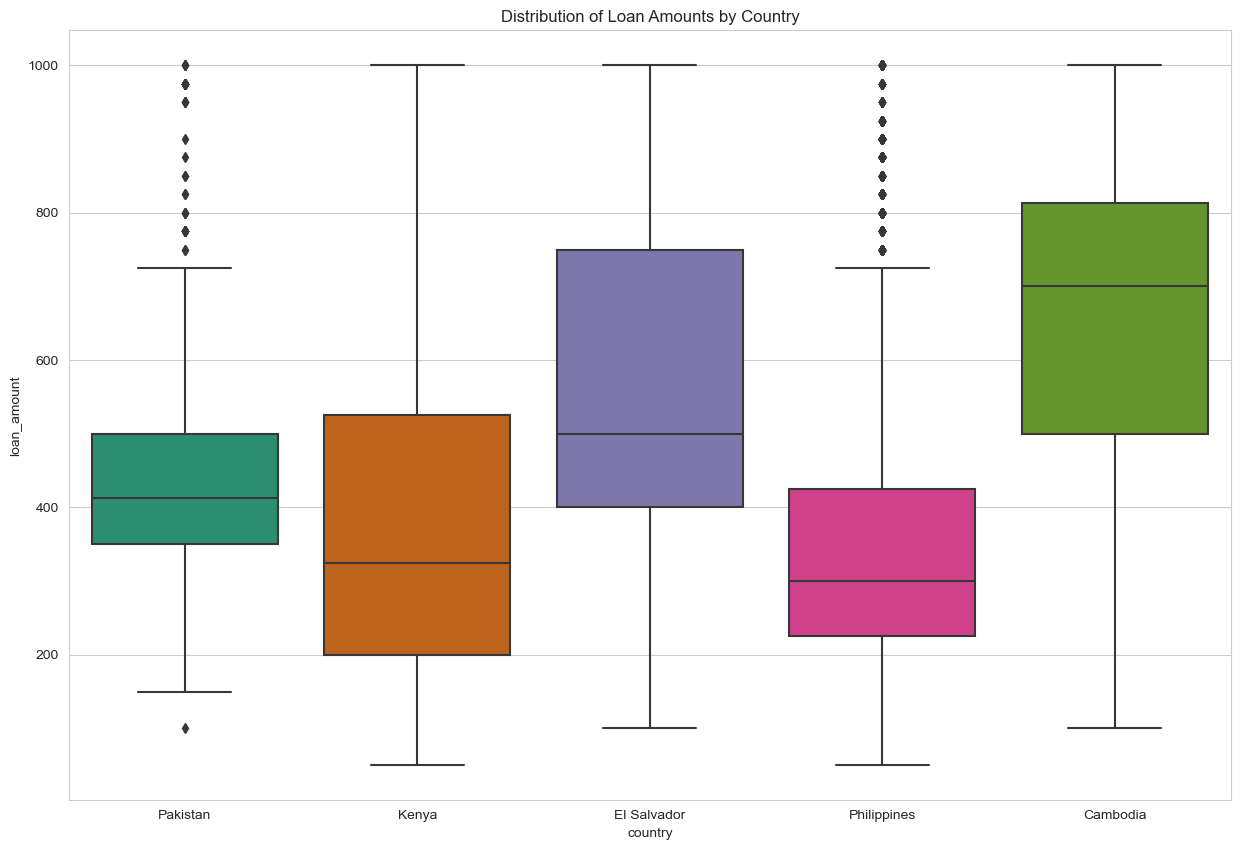

In [62]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df, x = 'country', y = 'loan_amount')
ax.set_title('Distribution of Loan Amounts by Country')

# Styling
sns.set_palette('Dark2')

Kenya is the country with the widest distribution. A person applying for a loan is most likely to receive the largest loan amount in Cambodia and lowest in Philippines. 


### Step 8: Compare the distribution of loans by activity

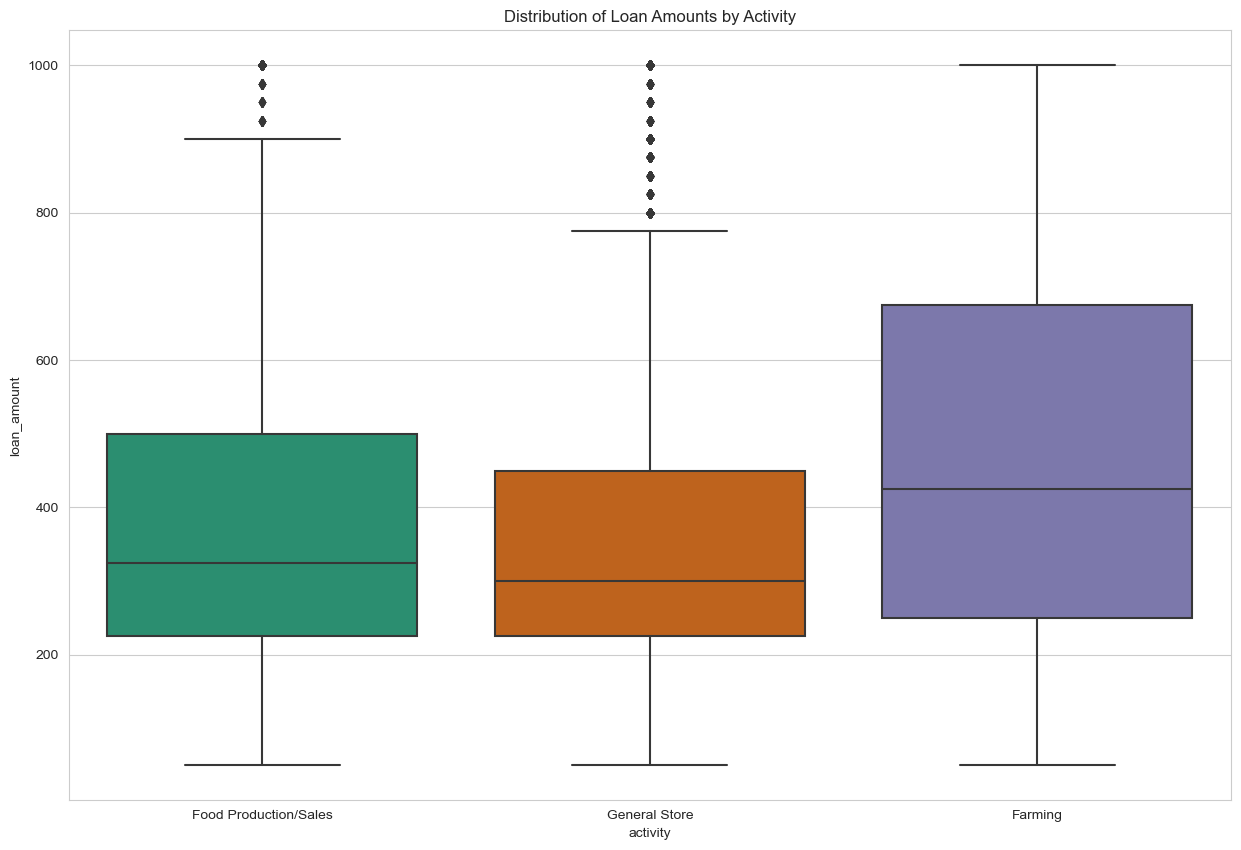

In [63]:
f, ax = plt.subplots(figsize=(15, 10))
sns.boxplot(data = df, x = 'activity', y = 'loan_amount')
ax.set_title('Distribution of Loan Amounts by Activity')

# Styling
sns.set_palette('Dark2')

The activity 'Farming' receives the highest average amount of loans and also has the widest distribution.

### Step 9: Compare the distribution of loans by country, split by gender

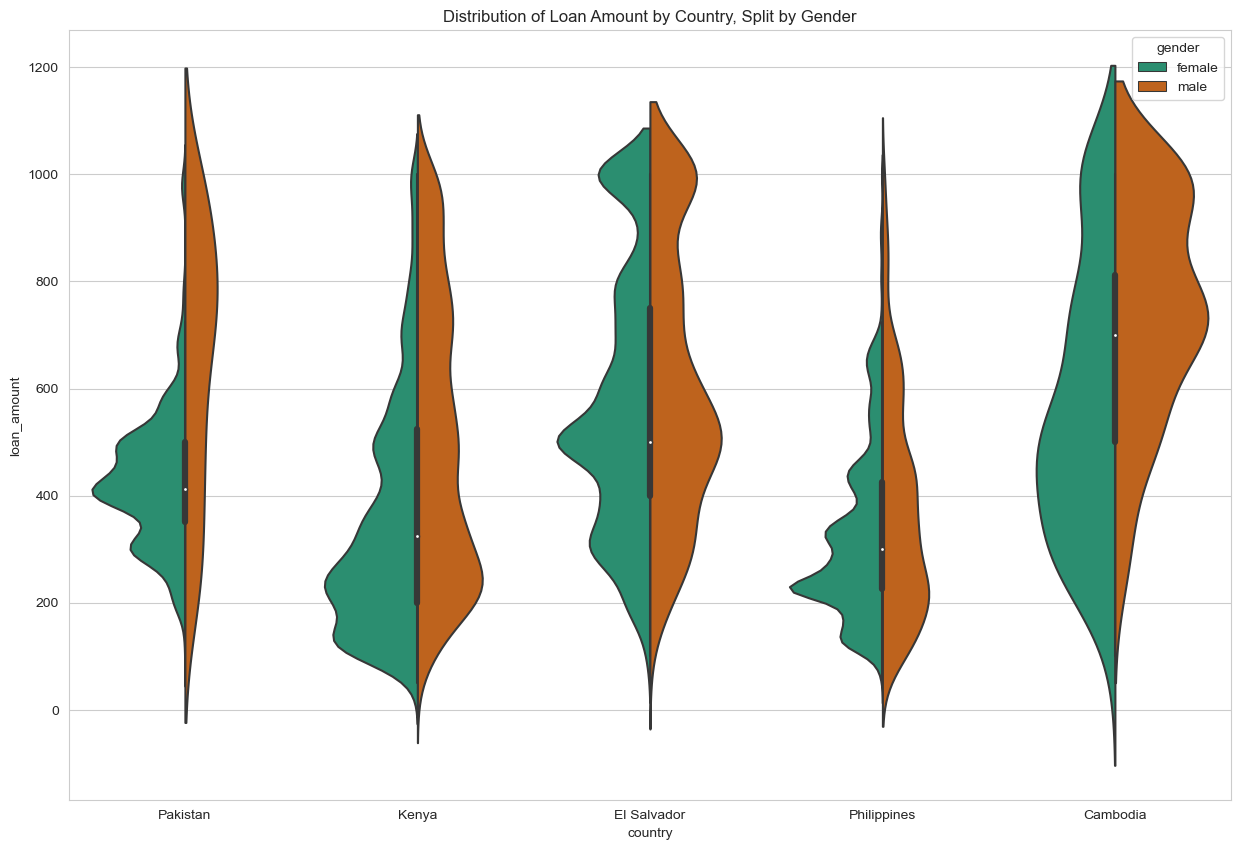

In [67]:
f, ax = plt.subplots(figsize=(15, 10))

sns.violinplot(data = df, x = 'country', y = 'loan_amount', hue = 'gender', split = True)
ax.set_title('Distribution of Loan Amount by Country, Split by Gender')

# Styling
sns.set_palette('Dark2')

The average amount of loans given to men is a lot higher in some of countries. The biggest differences are in Cambodia and Pakistan. In El Salvador the distribution for loans awarded to males and females is very similar.